In [0]:
# import os
# os.listdir('../input/')
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from python_utils import *
import time
import matplotlib.pyplot as plt
import cv2 as cv
from math import sqrt 
import pandas as pd
import numpy as np
from torchvision import transforms as tfs
import torch
from PIL import Image
from torch.autograd import Variable
from torchvision.utils import save_image
import pickle
import random
import argparse
import sys
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import ion, show

In [0]:
time_start = time.time()
time_start

In [0]:
datas = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Project/fer2013/fer2013.csv")
Data_RNN = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Project/fer2013/fer2013.csv")
datas

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


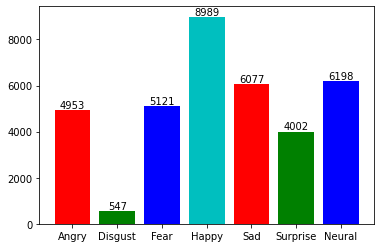

,emotion,pixels,Usage,lab_RNN
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,This person is feeling very angry
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,This person is feeling very angry
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,This person is feeling scared
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,This person is feeling sad
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,This person has no emotions
...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,This person has no emotions
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,This person is feeling Happy
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,This person is feeling very angry
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,This person is feeling Happy


In [0]:
lab = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neural']

## For RNN ## 

lab_RNN = ['This person is feeling very angry', 'This person is feeling Disgust', 
           'This person is feeling scared', 'This person is feeling Happy',
           'This person is feeling sad', 'This person is extremely surprised',
           'This person has no emotions']

def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Create the dictionary 
event_dictionary = {0 : 'This person is feeling very angry', 1 : 'This person is feeling Disgust',
                   2 : 'This person is feeling scared', 3 : 'This person is feeling Happy',
                   4 : 'This person is feeling sad', 5 : 'This person is extremely surprised',
                   6 : 'This person has no emotions'} 
  

# Add a new column named 'Price' 
Data_RNN['lab_RNN'] = Data_RNN['emotion'].apply(set_value, args =(event_dictionary, ))

labels_num = datas.emotion.value_counts()
la = [0,1,2,3,4,5,6]
la_num = [labels_num[i] for i in range(len(labels_num))]
print(labels_num)
plt.bar(range(len(la_num)), la_num,color='rgbc',tick_label=lab) 
for a,b in zip(la,la_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)  
plt.show() 

Data_RNN

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64


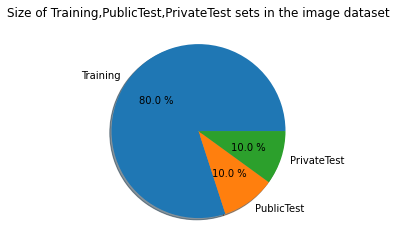

In [0]:
sets = datas.Usage.value_counts()
da = [sets[i] for i in range(len(sets))]
set_la = ['Training','PublicTest','PrivateTest']
print(sets)
plt.axes(aspect=1)
plt.title('Size of Training,PublicTest,PrivateTest sets in the image dataset')
plt.pie(x = da,labels = set_la,autopct='%3.1f %%', shadow=True)
plt.show()

In [0]:
print('Picture Length:',len(datas.pixels[1].split()))

Picture Length: 2304


In [0]:
time_1 = time.time()
print('Time to read：',round((time_1 - time_start),2),'s')

In [0]:
train_set = datas[(datas.Usage == 'Training')] 
val_set = datas[(datas.Usage == 'PublicTest')]
test_set = datas[(datas.Usage == 'PrivateTest')] 
X_train = np.array(list(map(str.split, train_set.pixels)), np.float32)
X_val = np.array(list(map(str.split, val_set.pixels)), np.float32) 
X_test = np.array(list(map(str.split, test_set.pixels)), np.float32) 
X_train = X_train.reshape(X_train.shape[0], 48, 48) 
X_val = X_val.reshape(X_val.shape[0],48,48) 
X_test = X_test.reshape(X_test.shape[0],48, 48) 

2.Tag Data Processing

In [0]:
y_train = list(train_set.emotion) 
y_val = list(val_set.emotion)
y_test = list(test_set.emotion )

3.Checking some samples

In [0]:
fig = plt.figure(figsize = (10,8))
for i in range(len(X_train[:35])):
    if(y_train[i] == 0 ):
        str_la = 'Angry'
        img = Image.fromarray(np.uint8(X_train[i]))
    elif(y_train[i] == 1):
        str_la = 'Disgust'
        img = Image.fromarray(np.uint8(X_train[i]))
    elif(y_train[i] == 2):
        str_la = 'Fear'
        img = Image.fromarray(np.uint8(X_train[i]))
    elif(y_train[i] == 3):
        str_la = 'Happy'
        img = Image.fromarray(np.uint8(X_train[i]))
    elif(y_train[i] == 4):
        str_la = 'Sad'
        img = Image.fromarray(np.uint8(X_train[i]))
    elif(y_train[i] == 5):
        str_la = 'Surprise'
        img = Image.fromarray(np.uint8(X_train[i]))
    elif(y_train[i] == 6):
        str_la = 'Neural'
        img = Image.fromarray(np.uint8(X_train[i]))
    y = fig.add_subplot(5,7,i+1)
    y.imshow(img,cmap='gray')
    plt.title(str_la)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

4.Data augmentation

In [0]:
train_preprocess = tfs.Compose([
    tfs.ToPILImage(),
    tfs.RandomCrop(44),
    tfs.RandomHorizontalFlip(),
    tfs.ToTensor(),
])



val_preprocess = tfs.Compose([
    tfs.ToPILImage(),
    tfs.TenCrop(44),
    tfs.Lambda(lambda crops: torch.stack([tfs.ToTensor()(crop) for crop in crops])),
])

In [0]:
import csv
import numpy as np
import pandas as pd
import torch
import torchvision.transforms as transforms
from PIL import Image
from torch.utils.data import DataLoader

batch_size= 128
class DataLr:

    def __init__(self, data):

        data_train = data[data.Usage == 'Training']
        data_validation = data[data.Usage == 'PrivateTest']
        data_Test = data[data.Usage == 'PublicTest']

        self.Y_train = data_train['emotion']
        X_train = data_train['pixels']

        self.Y_test = data_Test['emotion']
        self.X_test = data_Test['pixels']
        X_train = X_train.str.split(" ", n=2304, expand=True)
        self.X_train = X_train.astype(np.int)

        self.train_samples = X_train.shape[0]


class DataSetFactory:

    def __init__(self):
        images = []
        emotions = []
        private_images = []
        private_emotions = []
        public_images = []
        public_emotions = []

        with open("/content/drive/My Drive/Colab Notebooks/Project/fer2013/fer2013.csv", 'r') as csvin:
            data = csv.reader(csvin)
            next(data)
            for row in data:
                face = [int(pixel) for pixel in row[1].split()]
                face = np.asarray(face).reshape(48, 48)
                face = face.astype('uint8')

                if row[-1] == 'Training':
                    emotions.append(int(row[0]))
                    images.append(Image.fromarray(face))
                elif row[-1] == "PrivateTest":
                    private_emotions.append(int(row[0]))
                    private_images.append(Image.fromarray(face))
                elif row[-1] == "PublicTest":
                    public_emotions.append(int(row[0]))
                    public_images.append(Image.fromarray(face))

        print('training size %d : private val size %d : public val size %d' % (
            len(images), len(private_images), len(public_images)))
        train_transform = transforms.Compose([transforms.ToTensor()])
        
        val_transform = transforms.Compose([transforms.ToTensor()])
        
        test_transform = transforms.Compose([transforms.ToTensor()])
        
        self.training = DataSet(transform=train_transform, images=images, emotions=emotions)
        self.private = DataSet(transform=val_transform, images=private_images, emotions=private_emotions)
        self.public = DataSet(transform=test_transform, images=public_images, emotions=public_emotions)

class DataSet(torch.utils.data.Dataset):

    def __init__(self, transform=None, images=None, emotions=None):
        self.transform = transform
        self.images = images
        self.emotions = emotions

    def __getitem__(self, index):
        image = self.images[index]
        emotion = self.emotions[index]
        if self.transform is not None:
            image = self.transform(image)
        return image, emotion

    def __len__(self):
        return len(self.images)


# DataLoaders provide various ways to get batches of examples.

def loaders(Data, batch_size):
    Data = DataSetFactory()
    train_loader = torch.utils.data.DataLoader(Data.training, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(Data.private, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(Data.public, batch_size=batch_size, shuffle=True)
    return train_loader, val_loader, test_loader


Data = DataSetFactory()

train_loader, val_loader, test_loader = loaders(Data, batch_size)

training size 28709 : private val size 3589 : public val size 3589
training size 28709 : private val size 3589 : public val size 3589


In [0]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using %s for computation" % device)

Using cuda for computation


In [0]:
time_2 = time.time()
print('Data processing takes time：',round((time_2 - time_1),2),'s')

Data processing takes time： 40.16 s


Model building

In [0]:
import torch
from torch.utils import data
import numpy as np
import torch.optim as optim
import torch.nn as nn
import pandas as pd
import torch.nn.functional as F
import torchvision.models as models

In [0]:
class Train_Dataset(data.Dataset):
    def __init__(self,X_train,labels):
        super(Train_Dataset,self).__init__()
        img = []
        label = []
        label = labels
        a = [train_preprocess(X_train[i])  for i in range(X_train.shape[0])]
        img = a
        self.img = img
        self.label=labels
      
            
    def __getitem__(self, index):
        
        imgs = self.img[index]
        labels = self.label[index]
        imgs_tensors =  imgs.type('torch.cuda.FloatTensor')
        return imgs_tensors, labels
        
    
    def __len__(self):
        return len(self.img)

In [0]:
class Val_Dataset(data.Dataset):
    def __init__(self,X_val,labels):
        super(Val_Dataset,self).__init__()
        img = []
        label = []
        label = labels
        b = [val_preprocess(X_val[i])  for i in range(X_val.shape[0])]
        img = b
        self.img = img
        self.label=labels
      
             
    def __getitem__(self, index):
        
        imgs = self.img[index]
        labels = self.label[index]
        imgs_tensors =  imgs.type('torch.cuda.FloatTensor')
        return imgs_tensors, labels
        
    
    def __len__(self):
        return len(self.img)

In [0]:
def validate_train(model,dataset,batch_size):
    val_loader = data.DataLoader(dataset,batch_size,shuffle=True)
    result,num = 0.0, 0
    for images,labels in val_loader:
        images = images.cuda()
        pre = model.forward(images)
        pre = pre.cpu()
        pre = np.argmax(pre.data.numpy(),axis = 1)
        labels = labels.data.numpy()
        result += np.sum((pre == labels))
        num += len(images)
    acc = result / num
    return acc

In [0]:
def validate_val(model,dataset,batch_size):
    val_loader = data.DataLoader(dataset,batch_size,shuffle=True)
    result,num = 0.0, 0
    for images,labels in val_loader:
        for i in range(len(images)):
            images[i] = images[i].cuda()
            pre = model.forward(images[i])
            pre =pre.cpu()
            pre = np.argmax(pre.data.numpy().mean(0))
            if pre == labels[i] :
                result = result + 1
        num += len(images)
    acc = result / num
    return acc

Multi-model fusion(vgg19 + resnet18)

The first layer of the fusion model, training each base model（VGG19 + resnet18）

In [0]:
train_dataset = X_train
train_labels = y_train
Val_dataset = Val_Dataset( X_val,y_val)
Test_dataset = Val_Dataset(X_test,y_test)

batch_size= 128
learning_rate = 0.001
epochs= 20

#resnet18
resnet_historyloss = []
resnet_historyacc = []
resnet_historytrac = []
resnet_historytestac = []

#vgg19
vgg19_historyloss = []
vgg19_historyacc = []
vgg19_historytrac = []
vgg19_historytestac = []

#multiple
multiple_historyloss = []
multiple_historyacc = []
multiple_historytrac = []
multiple_historytestac = []

batch_size = 128

In [0]:
def train_resnet18(train_dataset,train_labels,Val_dataset,Test_dataset,batch_size,epochs,learning_rate,momen_tum,wt_decay):
    
# Build model
     resnet18 = models.resnet18()
     resnet18.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
     resnet18.fc = torch.nn.Linear(in_features=512, out_features=7, bias=True)
    
     model = resnet18.cuda()
# Loss function
     loss_function = nn.CrossEntropyLoss()
     loss_function =  loss_function.cuda()
    
# Optimizer
     optimizer = optim.SGD(model.parameters(),lr=learning_rate,momentum=momen_tum,weight_decay=wt_decay)

# Training
     print("Resnet18")
     for epoch in range(epochs):
# Each round of the input picture makes some changes to slow down the speed of overfitting
         Train_dataset = Train_Dataset(train_dataset,train_labels)
         train_loader = data.DataLoader(Train_dataset,batch_size,shuffle=True)
         loss_rate = 0
         model.train()
         for images,labels in train_loader:            
            images = images.cuda()
            labels = labels.cuda()
            optimizer.zero_grad()
            output = model.forward(images)
            loss_rate = loss_function(output,labels)
            loss_rate.backward()
            optimizer.step()
         resnet_historyloss.append(loss_rate.item())

# Print the loss per round 
         model.eval()
         acc_train = validate_train(model, Train_dataset, batch_size)
         resnet_historytrac.append(acc_train)

         acc_val = validate_val(model,Val_dataset,batch_size)
         resnet_historyacc.append(acc_val)

         acc_test = validate_val(model,Test_dataset,batch_size)
         resnet_historytestac.append(acc_test)
        
         if( (epoch+1) == epochs):
             print("Resnet18 Results：")
             print('The acc_train is :',acc_train)
             print('The acc_val is :',acc_val)
             print('The acc_test is :',acc_test)
             print('\n')

     
     print("Resnet18 Completed！")        
     return model

In [0]:
def train_vgg19(train_dataset,train_labels,Val_dataset,Test_dataset,batch_size,epochs,learning_rate,momen_tum,wt_decay):
 
# Build model
     vgg19 = models.vgg19()
     vgg19.features[0] = torch.nn.Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     vgg19.classifier[6] = torch.nn.Linear(in_features=4096, out_features=7, bias=True)
   
     model = vgg19.cuda()
# Loss function
     loss_function = nn.CrossEntropyLoss()
     loss_function =  loss_function.cuda()
    
# Optimizer
     optimizer = optim.SGD(model.parameters(),lr=learning_rate,momentum=momen_tum,weight_decay=wt_decay)

# Training
     print("VGG19")
     for epoch in range(epochs):
#        Each round of the input picture makes some changes to slow down the speed of overfitting
         Train_dataset = Train_Dataset(train_dataset,train_labels)
         train_loader = data.DataLoader(Train_dataset,batch_size,shuffle=True)
         loss_rate = 0
         model.train()
         for images,labels in train_loader:
             images = images.cuda()
             labels = labels.cuda()            
             optimizer.zero_grad()
             output = model.forward(images)
             loss_rate = loss_function(output,labels)
             loss_rate.backward()
             optimizer.step()
         vgg19_historyloss.append(loss_rate.item())


         model.eval()
         acc_train = validate_train(model, Train_dataset, batch_size)
         vgg19_historytrac.append(acc_train)

         acc_val = validate_val(model,Val_dataset,batch_size)
         vgg19_historyacc.append(acc_val)

         acc_test = validate_val(model,Test_dataset,batch_size)
         vgg19_historytestac.append(acc_test)


         if((epoch+1) == epochs):
            
             print("VGG19 Results：")
             print('The acc_train is :',acc_train)
             print('The acc_val is :',acc_val)
             print('The acc_test is :',acc_test)
             print('\n')

     print("VGG19 Completed！")       
     return model

In [0]:
resnet18 = train_resnet18(train_dataset,train_labels,Val_dataset,Test_dataset,batch_size,epochs,learning_rate ,momen_tum=0.9,wt_decay = 5e-4)
torch.save(resnet18,'fer2013_resnet18_model.pkl')

Resnet18
Resnet18 Results：
The acc_train is : 0.6853599916402522
The acc_val is : 0.5650599052660908
The acc_test is : 0.572025633881304


Resnet18 Completed！


In [0]:
vgg19 = train_vgg19(train_dataset,train_labels,Val_dataset,Test_dataset,batch_size,epochs,learning_rate ,momen_tum=0.9,wt_decay = 5e-4)
torch.save(vgg19,'fer2013_vgg19_model.pkl')

VGG19
VGG19 Results：
The acc_train is : 0.5891880594935386
The acc_val is : 0.5589300640847032
The acc_test is : 0.566731680133742


VGG19 Completed！


Load the trained base model

In [0]:
resnet = torch.load("fer2013_resnet18_model.pkl")

In [0]:
vgg = torch.load("fer2013_vgg19_model.pkl")

Build a fusion model network

In [0]:
class Multiple(nn.Module):
    def __init__(self):
        super(Multiple,self).__init__()        
        
        self.fc = nn.Sequential(
             nn.Linear(in_features = 14,out_features = 7),
        )
        
    def forward(self,x):
        
        #After base model preprocessing
        result_1 = vgg(x)
        result_2 = resnet(x)
        
        #Features after splicing the base model
        result_1 = result_1.view(result_1.shape[0],-1)
        result_2 = result_2.view(result_2.shape[0],-1)
        result = torch.cat((result_1,result_2),1)
        
        #Input the features processed by the base model into the fusion model
        y = self.fc(result)
        
        return y

In [0]:
def multiple_train(train_dataset,train_labels,Val_dataset,Test_dataset,batch_size,epochs,learning_rate,momen_tum,wt_decay):

    
# Build model
    model = Multiple()
    model = model.cuda()
    loss_function = nn.CrossEntropyLoss()
    loss_function =  loss_function.cuda()
    optimizer = optim.SGD(model.parameters(),lr=learning_rate,momentum=momen_tum,weight_decay=wt_decay)

    print("Fusion model starts training！")
    for epoch in range(epochs):
        Train_dataset = Train_Dataset(train_dataset,train_labels)
        train_loader = data.DataLoader(Train_dataset,batch_size,shuffle=True)
        loss_rate = 0
        model.train()
        for images,labels in train_loader:         
            images = images.cuda()
            labels = labels.cuda()
            optimizer.zero_grad()
            output = model(images)
            loss_rate = loss_function(output,labels)
            loss_rate.backward()
            optimizer.step()
        multiple_historyloss.append(loss_rate.item())        
        
        model.eval()
        
        acc_train = validate_train(model, Train_dataset, batch_size)
        multiple_historytrac.append(acc_train)
        
        acc_val = validate_val(model,Val_dataset,batch_size)
        multiple_historyacc.append(acc_val)
        
        acc_test = validate_val(model,Test_dataset,batch_size)
        multiple_historytestac.append(acc_test)

        
        print('After {} epochs : '.format(epoch+1))
        print('The loss_rate is :',loss_rate.item())
        print('The acc_train is :',acc_train)
        print('The acc_val is :',acc_val)
        print('The acc_test is :',acc_test)
        print('\n')
    
    print("End of fusion model training！")   
    
    return model

Fusion Model Results


In [0]:
model = multiple_train(train_dataset,train_labels,Val_dataset,Test_dataset,batch_size,epochs,learning_rate ,momen_tum=0.9,wt_decay = 5e-4)
torch.save(model,'fer2013_multiple_model.pkl')

Fusion model starts training！
After 1 epochs : 
The loss_rate is : 1.082017183303833
The acc_train is : 0.5988714340450729
The acc_val is : 0.5611590972415714
The acc_test is : 0.5706324881582614


After 2 epochs : 
The loss_rate is : 1.0117696523666382
The acc_train is : 0.6200494618412344
The acc_val is : 0.5756478127612148
The acc_test is : 0.5876288659793815


After 3 epochs : 
The loss_rate is : 1.135218620300293
The acc_train is : 0.6279563899822356
The acc_val is : 0.5767623293396489
The acc_test is : 0.5918083031485093


After 4 epochs : 
The loss_rate is : 0.9013888239860535
The acc_train is : 0.6300463269358041
The acc_val is : 0.5798272499303427
The acc_test is : 0.5968236277514628


After 5 epochs : 
The loss_rate is : 1.0410497188568115
The acc_train is : 0.6353756661674039
The acc_val is : 0.5817776539426024
The acc_test is : 0.5940373363053776


After 6 epochs : 
The loss_rate is : 1.0738463401794434
The acc_train is : 0.6349228464941308
The acc_val is : 0.58094176650877

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Multiple. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Variational Auto-Encoders Results

In [0]:
def sample_z(args):
    mu, log_sigma = args
    eps = Variable(torch.randn(mu.size())).to(device)
    return mu + torch.exp(log_sigma / 2) * eps


In [0]:
N_EPOCHS = 10           # times to run the model on complete data
INPUT_DIM = 48 * 48     # size of each input
HIDDEN_DIM = 256        # hidden dimension
LATENT_DIM = 50         

In [0]:
class Encoder(nn.Module):
    ''' This the encoder part of VAE
    '''
    def __init__(self, input_dim, hidden_dim, z_dim):
        '''
        Args:
            input_dim: A integer indicating the size of input.
            hidden_dim: A integer indicating the size of hidden dimension.
            z_dim: A integer indicating the latent dimension.
        '''
        super().__init__()
        # self.conv1 = nn.Sequential(
        #     nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
        #     nn.ReLU(True),
        # )
        self.linear = nn.Linear(input_dim, hidden_dim)
        self.mu = nn.Linear(hidden_dim, z_dim)
        self.var = nn.Linear(hidden_dim, z_dim)


    def forward(self, x):
        # x is of shape [batch_size, input_dim]
        # x = self.conv1(x)
        # x = x.view(x.size(0), -1)
        # x = x.view(-1, 64, 7, 7)
        hidden = F.relu(self.linear(x))
        # hidden is of shape [batch_size, hidden_dim]
        z_mu = self.mu(hidden)
        # z_mu is of shape [batch_size, latent_dim]
        z_var = self.var(hidden)
        # z_var is of shape [batch_size, latent_dim]

        return z_mu, z_var


class Decoder(nn.Module):
    ''' This the decoder part of VAE
    '''
    def __init__(self, z_dim, hidden_dim, output_dim):
        '''
        Args:
            z_dim: A integer indicating the latent size.
            hidden_dim: A integer indicating the size of hidden dimension.
            output_dim: A integer indicating the output dimension
        '''
        super().__init__()

        # self.conv2 = nn.Sequential(
        #     nn.ConvTranspose2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
        #     nn.ReLU(True),
        # )
        self.linear = nn.Linear(z_dim, hidden_dim)
        self.out = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # x is of shape [batch_size, latent_dim]
        # x = self.conv2(x)
        # x = x.view(x.size(0), -1)
        # x = x.view(-1, 64, 7, 7)
        hidden = F.relu(self.linear(x))
        # hidden is of shape [batch_size, hidden_dim]

        predicted = torch.sigmoid(self.out(hidden))
        # predicted is of shape [batch_size, output_dim]
        return predicted

class VAE(nn.Module):
    def __init__(self, enc, dec):
        ''' This the VAE, which takes a encoder and decoder.
        '''
        super().__init__()

        self.enc = enc
        self.dec = dec
    
    def forward(self, x):
        # encode
        z_mu, z_var = self.enc(x)

        # sample from the distribution having latent parameters z_mu, z_var
        # reparameterize
        std = torch.exp(z_var / 2)
        eps = torch.randn_like(std)
        x_sample = eps.mul(std).add_(z_mu)

        # decode
        predicted = self.dec(x_sample)
        return predicted, z_mu, z_var


In [0]:
encoder = Encoder(INPUT_DIM, HIDDEN_DIM, LATENT_DIM)

decoder = Decoder(LATENT_DIM, HIDDEN_DIM, INPUT_DIM)

model = VAE(encoder, decoder).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [0]:

recon_func = nn.BCELoss()
recon_func.size_average = False

def vae_loss(y_true, y_pred, log_sigma, mu):
    """ Compute loss = reconstruction loss + KL loss for each data in minibatch """
    # E[log P(X|z)]
    recon = recon_func(y_pred, y_true)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = 0.5 * torch.sum(torch.exp(log_sigma) + mu ** 2 - 1 - log_sigma, dim = 1)
    kl = torch.sum(kl, dim = 0)
    return recon, kl

def loss_function(recon_x, x, mu, logvar, epoch):
    #binary cross-entropy
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 48 * 48))
    #Kullback-Leibler divergence
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + 0.1*KLD


In [0]:
def train(epoch):
    model.train()
    train_loss = 0
    #change to train_loader_control for noninfected cells
    for batch_idx, (val, _) in enumerate(train_loader):
        val = val.view(-1, 48 * 48)
        val = val.to(device)
        
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(val)
        loss = loss_function(recon_batch, val, mu, logvar, epoch)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(val), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(val)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
        epoch, train_loss / len(train_loader.dataset)))

In [0]:
def test():
  # set the evaluation mode
  model.eval()

  # test loss for the data
  test_loss = 0

  # we don't need to track the gradients, since we are not updating the parameters during evaluation / testing
  with torch.no_grad():
      for i, (x, _) in enumerate(test_loader):
          # reshape the data
          x = x.view(-1, 48 * 48)
          x = x.to(device)

          # forward pass
          x_sample, z_mu, z_var = model(x)

          # reconstruction loss
          recon_loss = F.binary_cross_entropy(x_sample, x, size_average=False)
          
          # kl divergence loss
          kl_loss = 0.5 * torch.sum(torch.exp(z_var) + z_mu**2 - 1.0 - z_var)
          
          # total loss
          loss = recon_loss + kl_loss
          test_loss += loss.item()

  return test_loss


In [0]:
for epoch in range(1, 10):
        train(epoch)
        test_loss = test()
        print(test_loss)
        if epoch % 2 == 0:
          with torch.no_grad():
              sample = torch.randn(48, 48).cuda()
              z = torch.randn(1, LATENT_DIM).to(device)
              sample = model.dec(z)
              save_image(sample.view(48, 48),
                '/content/drive/My Drive/Colab Notebooks/Project/Final Project (1)/sample_' + str(epoch) + '.png')
              sample.view(48, 48)

Train Epoch: 1 [0/28709 (0%)]	Loss: 0.075981
Train Epoch: 1 [640/28709 (2%)]	Loss: 0.010510
Train Epoch: 1 [1280/28709 (4%)]	Loss: 0.010115
Train Epoch: 1 [1920/28709 (7%)]	Loss: 0.009692
Train Epoch: 1 [2560/28709 (9%)]	Loss: 0.009250
Train Epoch: 1 [3200/28709 (11%)]	Loss: 0.008784
Train Epoch: 1 [3840/28709 (13%)]	Loss: 0.008319
Train Epoch: 1 [4480/28709 (16%)]	Loss: 0.007911
Train Epoch: 1 [5120/28709 (18%)]	Loss: 0.007553
Train Epoch: 1 [5760/28709 (20%)]	Loss: 0.007239
Train Epoch: 1 [6400/28709 (22%)]	Loss: 0.006945
Train Epoch: 1 [7040/28709 (24%)]	Loss: 0.006689
Train Epoch: 1 [7680/28709 (27%)]	Loss: 0.006445
Train Epoch: 1 [8320/28709 (29%)]	Loss: 0.006288
Train Epoch: 1 [8960/28709 (31%)]	Loss: 0.006118
Train Epoch: 1 [9600/28709 (33%)]	Loss: 0.006014
Train Epoch: 1 [10240/28709 (36%)]	Loss: 0.005945
Train Epoch: 1 [10880/28709 (38%)]	Loss: 0.005805
Train Epoch: 1 [11520/28709 (40%)]	Loss: 0.005731
Train Epoch: 1 [12160/28709 (42%)]	Loss: 0.005686
Train Epoch: 1 [12800/287

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


5677656.188964844
Train Epoch: 2 [0/28709 (0%)]	Loss: 0.005409
Train Epoch: 2 [640/28709 (2%)]	Loss: 0.005424
Train Epoch: 2 [1280/28709 (4%)]	Loss: 0.005410
Train Epoch: 2 [1920/28709 (7%)]	Loss: 0.005388
Train Epoch: 2 [2560/28709 (9%)]	Loss: 0.005406
Train Epoch: 2 [3200/28709 (11%)]	Loss: 0.005413
Train Epoch: 2 [3840/28709 (13%)]	Loss: 0.005394
Train Epoch: 2 [4480/28709 (16%)]	Loss: 0.005399
Train Epoch: 2 [5120/28709 (18%)]	Loss: 0.005416
Train Epoch: 2 [5760/28709 (20%)]	Loss: 0.005406
Train Epoch: 2 [6400/28709 (22%)]	Loss: 0.005384
Train Epoch: 2 [7040/28709 (24%)]	Loss: 0.005406
Train Epoch: 2 [7680/28709 (27%)]	Loss: 0.005396
Train Epoch: 2 [8320/28709 (29%)]	Loss: 0.005398
Train Epoch: 2 [8960/28709 (31%)]	Loss: 0.005418
Train Epoch: 2 [9600/28709 (33%)]	Loss: 0.005392
Train Epoch: 2 [10240/28709 (36%)]	Loss: 0.005398
Train Epoch: 2 [10880/28709 (38%)]	Loss: 0.005394
Train Epoch: 2 [11520/28709 (40%)]	Loss: 0.005370
Train Epoch: 2 [12160/28709 (42%)]	Loss: 0.005378
Train E

CNN RNN for Image Captioning

1. Using pre-trained resnet and replacing the top fc layer

In [0]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.nn.utils.rnn import pack_padded_sequence


class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        """Load the pretrained ResNet-152 and replace top fc layer."""
        super(EncoderCNN, self).__init__()
        resnet = models.resnet152(pretrained=True)
        modules = list(resnet.children())[:-1]      # delete the last fc layer.
        self.resnet = nn.Sequential(*modules)
        self.linear = nn.Linear(resnet.fc.in_features, embed_size)
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)
        
    def forward(self, images):
        """Extract feature vectors from input images."""
        with torch.no_grad():
            features = self.resnet(images)
        features = features.reshape(features.size(0), -1)
        features = self.bn(self.linear(features))
        return features


class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers, max_seq_length=20):
        """Set the hyper-parameters and build the layers."""
        super(DecoderRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seg_length = max_seq_length
        
    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generates captions."""
        embeddings = self.embed(captions)
        embeddings = torch.cat((features.unsqueeze(1), embeddings), 1)
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True) 
        hiddens, _ = self.lstm(packed)
        outputs = self.linear(hiddens[0])
        return outputs
    
    def sample(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []
        inputs = features.unsqueeze(1)
        for i in range(self.max_seg_length):
            hiddens, states = self.lstm(inputs, states)          # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))            # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)                        # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)                       # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)                         # inputs: (batch_size, 1, embed_size)
        sampled_ids = torch.stack(sampled_ids, 1)                # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids

In [0]:
class Vocabulary(object):
    """Simple vocabulary wrapper."""
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word):
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1

    def __call__(self, word):
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [0]:
# get the losses for vizualization
losses = list()
val_losses = list()

for epoch in range(1, 10+1):
    
    for i_step in range(1, total_step+1):
        
        # zero the gradients
        decoder.zero_grad()
        encoder.zero_grad()
        
        # set decoder and encoder into train mode
        encoder.train()
        decoder.train()
        
        # Randomly sample a caption length, and sample indices with that length.
        indices = train_data_loader.dataset.get_train_indices()
        
        # Create and assign a batch sampler to retrieve a batch with the sampled indices.
        new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
        train_data_loader.batch_sampler.sampler = new_sampler
        
        # Obtain the batch.
        images, captions = next(iter(train_data_loader))
        
        # make the captions for targets and teacher forcer
        captions_target = captions[:, 1:].to(device)
        captions_train = captions[:, :captions.shape[1]-1].to(device)

        # Move batch of images and captions to GPU if CUDA is available.
        images = images.to(device)
        
        # Pass the inputs through the CNN-RNN model.
        features = encoder(images)
        outputs = decoder(features, captions_train)
        
        # Calculate the batch loss
        loss = criterion(outputs.view(-1, vocab_size), captions_target.contiguous().view(-1))
        
        # Backward pass
        loss.backward()
        
        # Update the parameters in the optimizer
        optimizer.step()
        
        # - - - Validate - - -
        # turn the evaluation mode on
        with torch.no_grad():
            
            # set the evaluation mode
            encoder.eval()
            decoder.eval()

            # get the validation images and captions
            val_images, val_captions = next(iter(val_data_loader))

            # define the captions
            captions_target = val_captions[:, 1:].to(device)
            captions_train = val_captions[:, :val_captions.shape[1]-1].to(device)

            # Move batch of images and captions to GPU if CUDA is available.
            val_images = val_images.to(device)

            # Pass the inputs through the CNN-RNN model.
            features = encoder(val_images)
            outputs = decoder(features, captions_train)

            # Calculate the batch loss.
            val_loss = criterion(outputs.view(-1, vocab_size), captions_target.contiguous().view(-1))
        
        # append the validation loss and training loss
        val_losses.append(val_loss.item())
        losses.append(loss.item())
        
        # save the losses
        np.save('losses', np.array(losses))
        np.save('val_losses', np.array(val_losses))
        
        # Get training statistics.
        stats = 'Epoch [%d/%d], Step [%d/%d], Loss: %.4f, Val Loss: %.4f' % (epoch, num_epochs, i_step, total_step, loss.item(), val_loss.item())
        
        # Print training statistics (on same line).
        print('\r' + stats, end="")
        sys.stdout.flush()
            
    # Save the weights.
    if epoch % save_every == 0:
        print("\nSaving the model")
        torch.save(decoder.state_dict(), os.path.join('./models', 'decoder-%d.pth' % epoch))
        torch.save(encoder.state_dict(), os.path.join('./models', 'encoder-%d.pth' % epoch))

In [0]:
print("End of all model training！")

End of all model training！


In [0]:
time_3 = time.time()
print('Model training time-consuming：',round((time_3 - time_2) / 3600,2),'h')

Model training time-consuming： 2.49 h


Check whether the model parameters of the first layer of the fusion model remain the same (keep the same). Saving the model after training is different from saving the model after all training. Save the model after training. If you do n’t fix the parameters, you will find that in the fusion model, the previously trained model parameters change. If all models are saved after training, the final result will be that all model parameters become the same, because when the fusion model is trained , Other models do not have fixed parameters, and then when the fusion model is trained, the parameters are updated again

Load the base model and the fusion model separately

In [0]:
mul = torch.load('fer2013_multiple_model.pkl')
# vgg = torch.load('fer2013_vgg19_model.pkl')
# resnet = torch.load('fer2013_resnet18_model.pkl')

Draw a graph

In [0]:
def plots(historyloss,historyacc,historytrac,historytestac):
    
    epochs = range(len(historyacc))

    plt.plot(epochs,historyloss,'r', label='train_loss')
    plt.plot(epochs,historyacc,'b', label='acc_val')
    plt.plot(epochs,historytrac,'g', label='acc_train')
    plt.plot(epochs,historytestac,'y', label='acc_test')

    plt.title('epoch and acc and loss_rate')
    plt.xlabel('epoch')
    plt.ylabel('acc and loss')
    plt.legend()
    plt.figure()
    

resnet18 model


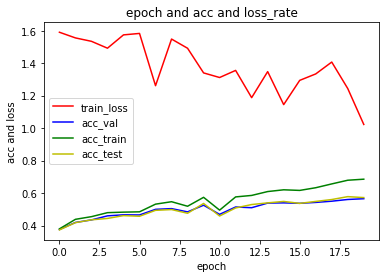

<Figure size 432x288 with 0 Axes>

In [0]:
print("resnet18 model")
plots(resnet_historyloss,resnet_historyacc,resnet_historytrac,resnet_historytestac)

vgg19 model


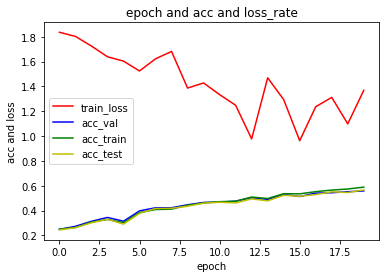

<Figure size 432x288 with 0 Axes>

In [0]:
print("vgg19 model")
plots(vgg19_historyloss,vgg19_historyacc,vgg19_historytrac,vgg19_historytestac)

Fusion model


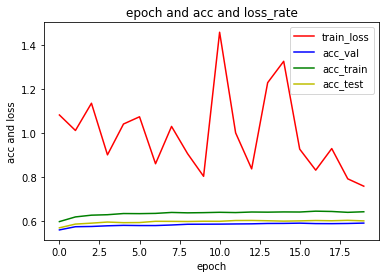

<Figure size 432x288 with 0 Axes>

In [0]:
print("Fusion model")
plots(multiple_historyloss,multiple_historyacc,multiple_historytrac,multiple_historytestac)

Draw the confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def plot_confusion_matrix(model,dataset,batch_size):
    y_true = []
    y_pred = []
    label = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neural']
    tick_marks = np.array(range(len(label))) + 0.5
    
    val_loader = data.DataLoader(dataset,batch_size,shuffle=True)
    for images,labels in val_loader:
        for i in range(len(images)):
            images[i] = images[i].cuda()
            pre = model.forward(images[i])
            pre =pre.cpu()
            pre = np.argmax(pre.data.numpy().mean(0))
            y_true.append(labels[i])
            y_pred.append(pre)
    
    cm = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6), dpi=80)

    ind_array = np.arange(len(label))
    x, y = np.meshgrid(ind_array, ind_array)
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm_normalized[y_val][x_val]
        if c > 0.01:
            plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=10, va='center', ha='center')
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)

   
    plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    xlocations = np.array(range(len(label)))
    plt.xticks(xlocations, label, rotation=70)
    plt.yticks(xlocations, label)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

In [0]:
y_val = list(val_set.emotion)
dataset = Val_Dataset( X_val,y_val)
batch_size = 128

vgg19 Confusion Matrix


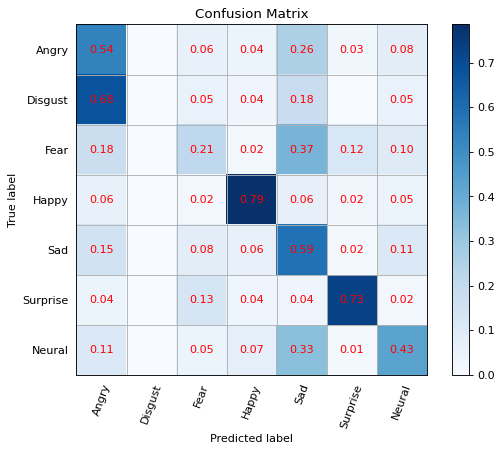

resnet18 Confusion Matrix


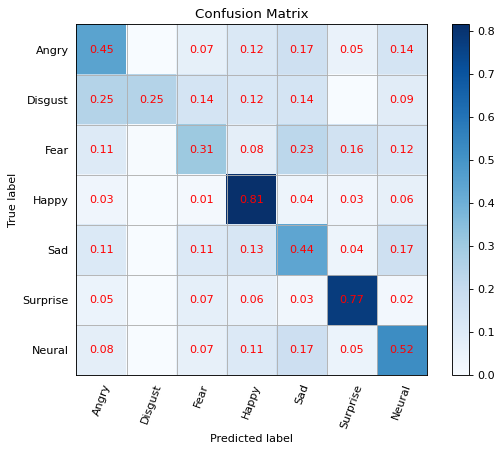

Fusion model Confusion Matrix


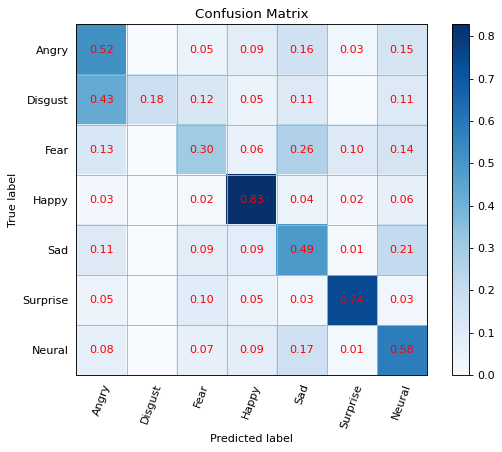

In [0]:
print("vgg19 Confusion Matrix")
plot_confusion_matrix(vgg,dataset,batch_size)

print("resnet18 Confusion Matrix")
plot_confusion_matrix(resnet,dataset,batch_size)

print("Fusion model Confusion Matrix")
plot_confusion_matrix(mul,dataset,batch_size)

Model loading and verification

In [0]:
model = torch.load('fer2013_multiple_model.pkl')

In [0]:
# Regenerate the label information here
y_val = list(val_set.emotion)
y_test = list(test_set.emotion)

In [0]:
Va_dataset = Val_Dataset( X_val,y_val)
acc_val = validate_val(model,Va_dataset,128)
print('Accuracy：',acc_val)

Accuracy： 0.5920869322931178


Random single picture to test

In [0]:
def validate(model,dataset,batch_size):
    val_loader = data.DataLoader(dataset,batch_size,shuffle=True)
    result,num = 0.0, 0
    y_pred = []
    
    for images,labels in val_loader:
        for i in range(len(images)):
            images[i] = images[i].cuda()
            pre = model.forward(images[i])
            pre =pre.cpu()
            pre = np.argmax(pre.data.numpy().mean(0))
            y_pred.append(pre)
    return y_pred

Test all categories of pictures separately within a certain range.

In [0]:
i = 1000
j = 1100
img_val = X_val[i:j]
label_val = y_val[i:j]
im_0= []
im_1= []
im_2= []
im_3= []
im_4= []
im_5= []
im_6= []
la_0 = []
la_1 = []
la_2 = []
la_3 = []
la_4 = []
la_5 = []
la_6 = []
for k in range(len(img_val)):
    
    if(label_val[k] == 0):
        
        im_0.append(img_val[k])
        la_0.append(0)
                
    elif(label_val[k] == 1):
        
        im_1.append(img_val[k])
        la_1.append(1)
        
    elif(label_val[k] ==2):
        
        im_2.append(img_val[k])
        la_2.append(2)
        
    elif(label_val[k] ==3):
        
        im_3.append(img_val[k])
        la_3.append(3)
        
    elif(label_val[k] ==4):
        
        im_4.append(img_val[k])
        la_4.append(4)
        
    elif(label_val[k] ==5):
        
        im_5.append(img_val[k])
        la_5.append(5)
        
    elif(label_val[k] ==6):
        
        im_6.append(img_val[k])
        la_6.append(6)
         

In [0]:
x_lis = []
y_lis = []
x_lis.append(np.array(im_0))
x_lis.append(np.array(im_1))
x_lis.append(np.array(im_2))
x_lis.append(np.array(im_3))
x_lis.append(np.array(im_4))
x_lis.append(np.array(im_5))
x_lis.append(np.array(im_6))
y_lis.append(la_0)
y_lis.append(la_1)
y_lis.append(la_2)
y_lis.append(la_3)
y_lis.append(la_4)
y_lis.append(la_5)
y_lis.append(la_6)

In [0]:
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neural']

In [0]:
for i in range(len(x_lis)):
    Va_dataset = Val_Dataset( x_lis[i],y_lis[i])
    pre = validate(model,Va_dataset,1)
    print(labels[y_lis[i][0]])
    print('actual results：\t',y_lis[i])
    print('The prediction result is：\t',pre)

Angry
actual results：	 [0, 0, 0, 0, 0, 0, 0, 0]
The prediction result is：	 [4, 0, 0, 2, 0, 0, 0, 0]
Disgust
actual results：	 [1, 1]
The prediction result is：	 [4, 0]
Fear
actual results：	 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
The prediction result is：	 [0, 6, 6, 4, 4, 5, 4, 4, 2, 3, 0, 3, 6, 4, 2, 2, 2, 0, 4]
Happy
actual results：	 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
The prediction result is：	 [3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3, 0]
Sad
actual results：	 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
The prediction result is：	 [3, 4, 4, 4, 4, 4, 6, 2, 4, 0, 4, 4, 0, 4, 0, 3, 3, 2]
Surprise
actual results：	 [5, 5, 5, 5, 5, 5, 5, 5, 5]
The prediction result is：	 [3, 3, 4, 5, 5, 5, 5, 6, 5]
Neural
actual results：	 [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
The prediction result is：	 [6, 0, 3, 6, 3, 6, 6, 6, 4, 4, 2, 6, 4, 6, 4]


End of program, running time

In [0]:
time_end = time.time()
time_c= time_end - time_start 
print('Total time:',round(time_c / 3600,2) , 'h')

Total time: 3.06 h
